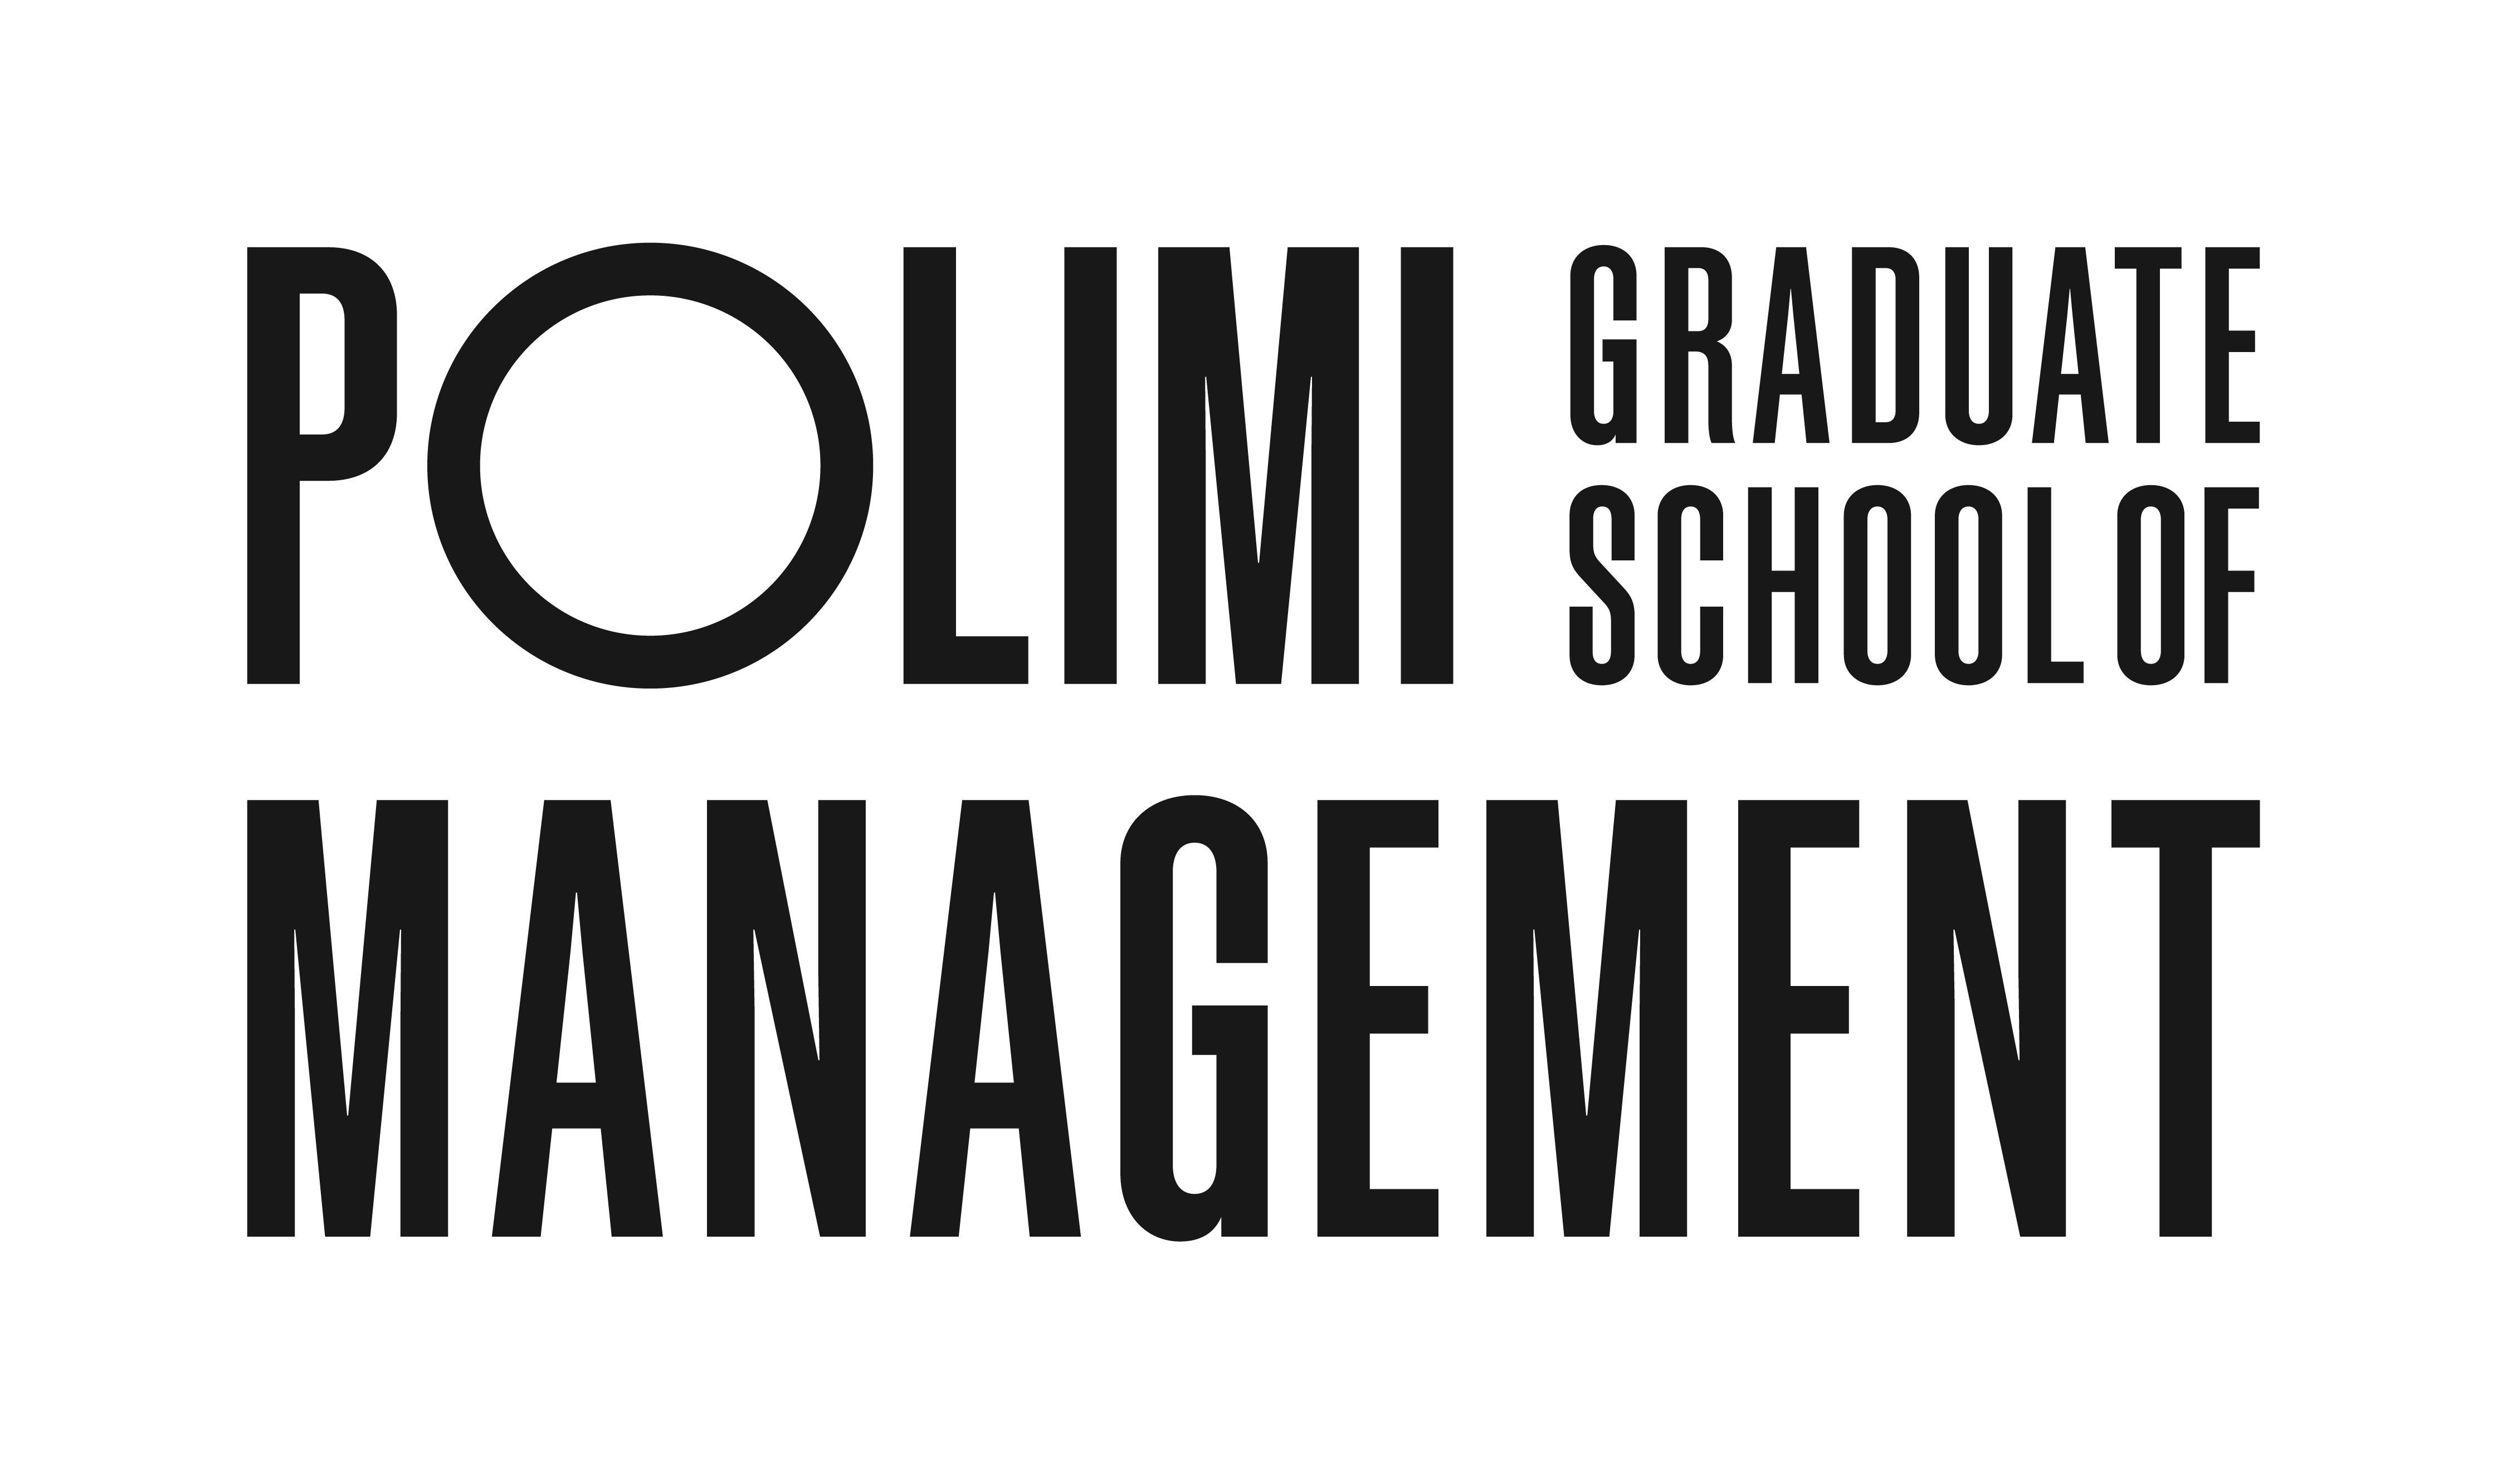

In [1]:
from IPython import display
display.Image('gsom-logo.png', width = 300, height = 300)

## Trading of financial instruments module demonstration

Author: Lorenzo Baggi

Question: please, demonstrate that an option with the following payoff: 

\begin{equation}
\Large {Price = VN \cdot max \biggl(0, \frac{1}{S_0} \bigl( \frac{\sum_{i = 1}^{N} S_i^+}{N} \bigr) - S_0 \biggr),}
\end{equation}

where:

\begin{equation}
\Large {S_i^+ = max(S_i, S_0)},
\end{equation}

can be computed as the mean of several european options.

In [2]:
# importing needed libraries

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# importing needed data

n_sim = 1*10**1    # number of simulations: 100
X0 = 100           # assumed security starting price
K = X0             # assumed strike of the options
T = 7              # maturity of the exotic option
sigma = 0.05       # assumed volatility
dt = 0.5           # assumed discretization along T-axis
risk_free = 3/100  #assumed risk-free rate

In [4]:
# initializing the needed vectors

time = np.arange(0, T+dt, dt)            # time vector
X_t = np.zeros(len(time))                # security price along time
X_t[0] = X0
floor = np.zeros(len(time)-1)            # needed for exotic option
Price_Call = np.zeros(len(time)-1)       # needed for vanilla-like options
error = np.zeros(n_sim)                  # error vector
X_table = np.zeros((n_sim, len(time)))   # initializing the dataframe

Assuming tht the security price follows a log-normal distribution, it can be written that, under Risk-Neutral measure:

\begin{equation}
\LARGE {S_i = S_{i-1} e^{(r - \sigma^2/2) \sqrt{( \Delta t)} + \sigma \Delta \: t \: z}.}
\end{equation}


In [5]:
# firstly, the security price is evaluated, time step by time step. then, this is done for the desired
# number of simulations
# everything is then stored into the dataframe X_table
# the error is equal to the difference between the price of the exotic option and the mean of vanilla-like options

for _ in range(0,n_sim):
    for i in range(1,len(time)):
        X_t[i] = X_t[i-1]*np.exp((risk_free - sigma**2/2)*np.sqrt(dt) + sigma*dt*np.random.randn())
        floor[i-1] = max(X_t[i],X0)
        Price_Call[i-1] = max(X_t[i]-K,0)*np.exp(-risk_free*T)      
    X_table[_,:] = X_t
    
    Price_Black = np.sum(Price_Call)/len(Price_Call)/X0
    Price_Exotic = max((np.mean(floor)-K)/X0,0)*np.exp(-risk_free*T)
    error[_] = Price_Black - Price_Exotic

In [6]:
error_rounded = round(np.mean(error), 2)
print("The mean of the error w/ {} simulations is equal to: {}" .format(n_sim, error_rounded))
print("\n")
print("Since the error is equal to 0, the exotic option can be priced w/ vanilla-like-options")

The mean of the error w/ 10 simulations is equal to: 0.0


Since the error is equal to 0, the exotic option can be priced w/ vanilla-like-options


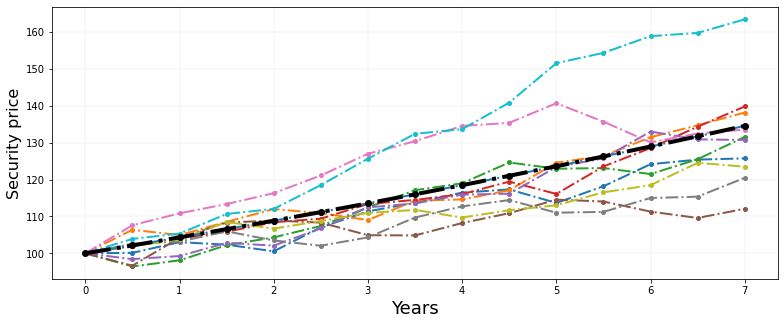

In [7]:
# creating the plot

risk_free_Curve = np.zeros(len(time))
risk_free_Curve[0] = X0    
for i in range(1,len(time)): 
    risk_free_Curve[i] = risk_free_Curve[i-1]*np.exp(risk_free*np.sqrt(dt))

data = np.vstack([X_table, risk_free_Curve])

for i in range(len(data)):
    plt.rcParams['figure.figsize'] = [13, 5]
    plt.plot(time, data[i,:], marker='o', linestyle='-.', linewidth=2, markersize=4)

plt.plot(time, data[n_sim,:], marker='o', linestyle='-.', linewidth=4, markersize=6, color = 'black')
plt.xlabel("Years", fontsize=18)
plt.ylabel("Security price", fontsize=16)
plt.grid(color='k', linestyle='-', linewidth=0.05)
plt.show()